In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 30)

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Data Cleaning

#Information about Data
Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

Only 7043 rows
There are 21 columns with 19 features
Only 11 missing values.

In [2]:
raw_data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print ('Rows:', raw_data.shape[0])
print ('Columns:', raw_data.shape[1])
print ('Missing Values:',raw_data.isnull().sum().values.sum())
print ('Numerical Columns:', raw_data.describe().columns.values.shape[0])
print ('Categorical Columns:', raw_data.shape[1] - raw_data.describe().columns.values.shape[0])
print ('Unique Values:\n', raw_data.nunique())

Rows: 7043
Columns: 21
Missing Values: 0
Numerical Columns: 3
Categorical Columns: 18
Unique Values:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [4]:

#Display all columns
##Type of Total Charges is String, Converting to int after converting null values from TotalCharges to numpy null

type(raw_data['TotalCharges'][0])
raw_data['TotalCharges'] = raw_data['TotalCharges'].replace(' ', np.NaN)
raw_data['TotalCharges'] = raw_data['TotalCharges'].astype(float)

#Dropping null rows from total charges
raw_data = raw_data.dropna()

raw_data = raw_data.reset_index(drop=True)


In [5]:

categorical_columns_with_2_categories = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService','PaperlessBilling']

categorical_columns_with_3_categories = [  'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

categorical_columns_with_4_categories=['PaymentMethod']

###Below code used to  check what are the categories, and whether we need to modify some of them or not
print('2 categories:')
for i in categorical_columns_with_2_categories:
    print( i , raw_data[i].unique(),'\n')

print('\n3 categories:')
for i in categorical_columns_with_3_categories:
    print( i , raw_data[i].unique(),'\n')   

print('\n4 categories:')
for i in categorical_columns_with_4_categories:
    print( i , raw_data[i].unique(),'\n')     



2 categories:
gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

PhoneService ['No' 'Yes'] 

PaperlessBilling ['Yes' 'No'] 


3 categories:
MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 


4 categories:
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



In [6]:
print('Checking if there are any null rows in Categorical columns\nActual rows:', raw_data.shape[0])
for i in categorical_columns_with_2_categories:
    print('Not null rows in ', i ,':',raw_data[i][raw_data[i]==raw_data[i].unique()[0]].count() + raw_data[i][raw_data[i]==raw_data[i].unique()[1]].count())

for i in categorical_columns_with_3_categories:
    print('Not null rows in ', i ,':',raw_data[i][raw_data[i]==raw_data[i].unique()[0]].count() + raw_data[i][raw_data[i]==raw_data[i].unique()[1]].count() + raw_data[i][raw_data[i]==raw_data[i].unique()[2]].count())

for i in categorical_columns_with_4_categories:
    print('Not null rows in ', i ,':',raw_data[i][raw_data[i]==raw_data[i].unique()[0]].count() + raw_data[i][raw_data[i]==raw_data[i].unique()[1]].count() + raw_data[i][raw_data[i]==raw_data[i].unique()[2]].count() + raw_data[i][raw_data[i]==raw_data[i].unique()[3]].count())
    

Checking if there are any null rows in Categorical columns
Actual rows: 7032
Not null rows in  gender : 7032
Not null rows in  SeniorCitizen : 7032
Not null rows in  Partner : 7032
Not null rows in  Dependents : 7032
Not null rows in  PhoneService : 7032
Not null rows in  PaperlessBilling : 7032
Not null rows in  MultipleLines : 7032
Not null rows in  InternetService : 7032
Not null rows in  OnlineSecurity : 7032
Not null rows in  OnlineBackup : 7032
Not null rows in  DeviceProtection : 7032
Not null rows in  TechSupport : 7032
Not null rows in  StreamingTV : 7032
Not null rows in  StreamingMovies : 7032
Not null rows in  Contract : 7032
Not null rows in  PaymentMethod : 7032


#Creating Checkpoint

In [7]:
raw_data_1 = raw_data.copy()

In [8]:
raw_data_1 = raw_data.drop('customerID',axis =1)

In [9]:
#Replacing 'No internet service' with 'No'
columns_1 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in columns_1:
       raw_data_1[i]=raw_data_1[i].replace('No internet service','No')

columns_2 = ['MultipleLines']
for i in columns_2:
       raw_data_1[i]=raw_data_1[i].replace('No phone service','No')
        
columns_3 = ['Churn']
for i in columns_3:
    raw_data_1[i]=raw_data_1[i].replace('Yes',1)
    raw_data_1[i]=raw_data_1[i].replace('No',0)

In [10]:


##Confirming whether replacement was successfull or not
for i in categorical_columns_with_3_categories:
    print( i , raw_data_1[i].unique(),'\n') 

MultipleLines ['No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes'] 

OnlineBackup ['Yes' 'No'] 

DeviceProtection ['No' 'Yes'] 

TechSupport ['No' 'Yes'] 

StreamingTV ['No' 'Yes'] 

StreamingMovies ['No' 'Yes'] 

Contract ['Month-to-month' 'One year' 'Two year'] 



In [11]:
##When we look at tenure, total unique values are 72 in record of 7032, so it is a categorical number hidden under numbers, if taken as quantitatively it will distrub our model
##As there are 72 unique values in tenure, so we can not create each column of OHE for tenure, so we will create groups based on tenure and later create OHE based on those groups.
##using Sorted function to check whether there are any missing values
#sorted(raw_data_1['tenure'].unique())

#  Exploration of Data

In [12]:
temp_c = ['SeniorCitizen']
##Creating Categories for Senior Citizen under YES and NO it will make extraction of dummies easier later on
for i in temp_c:
    raw_data_1[i]=raw_data_1[i].replace(1,'Yes')
    raw_data_1[i]=raw_data_1[i].replace(0,'No')

In [13]:
raw_data_1.head()
numerical_features=['MonthlyCharges','TotalCharges','tenure']
categorical_features = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
]


In [14]:
#Creating Checkpoint
raw_data_2 = raw_data_1.copy()

#Customer Attrition

In [15]:
temp =raw_data_2.groupby(['Churn']).count()['gender']
p2 = raw_data_2['Churn'].value_counts().values

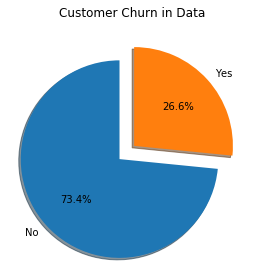

In [16]:
fig1, ax1= plt.subplots(1)
explode = (0.2,0)

labels = ['No','Yes']

#p2 = [temp[0],temp[1]]
ax1.set_title('Customer Churn in Data ')
ax1.pie(p2, explode=explode, autopct='%1.1f%%',
        shadow=True,labels=labels, startangle=90)


plt.tight_layout()
plt.show()


#Customer Attrition According to Different categories

In [17]:
def non_churn(cat_col):
    temp = raw_data_2.groupby(['Churn',cat_col])['Churn'].count()
    return temp[0]
def churn(cat_col):
    temp = raw_data_2.groupby(['Churn',cat_col])['Churn'].count()
    return temp[1]

def pie_cat(cat_col,explode=(0.2,0)):
    p2= non_churn(cat_col)
    p3 = churn(cat_col)
    fig1,(ax2,ax3) = plt.subplots(1,2,figsize=(10,10))

    labels = raw_data_2[cat_col].unique()
    ax3.pie(p3, explode=explode, autopct='%1.1f%%',
        shadow=True,labels=labels, startangle=90)
    ax2.pie(p2,  autopct='%1.1f%%',
        shadow=True,labels=labels, startangle=90)
    ax2.set_title('Non Churn customers')
    ax3.set_title(' Churn customers')
    plt.suptitle('Churn Distribution in '+ cat_col,fontsize='15')
    plt.tight_layout()
    plt.show()


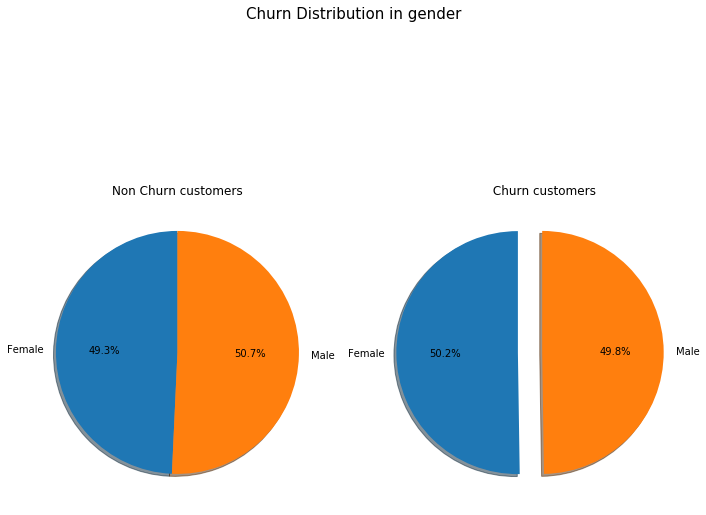

In [18]:
#for i in range(16):
#    pie_cat(categorical_features[i])
ex = (0.1,0.1,0.1)

pie_cat(categorical_features[0])
#pie_cat(categorical_features[1])
#pie_cat(categorical_features[2])

In [19]:
#pie_cat(categorical_features[3])
#pie_cat(categorical_features[4])
#pie_cat(categorical_features[5])

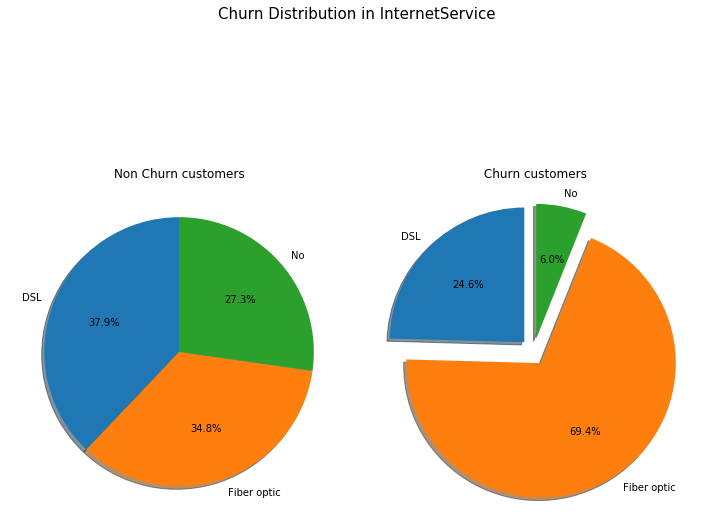

In [20]:
ex = (0.1,0.1,0.1)

pie_cat(categorical_features[6],ex)
#pie_cat(categorical_features[7])
#pie_cat(categorical_features[8])

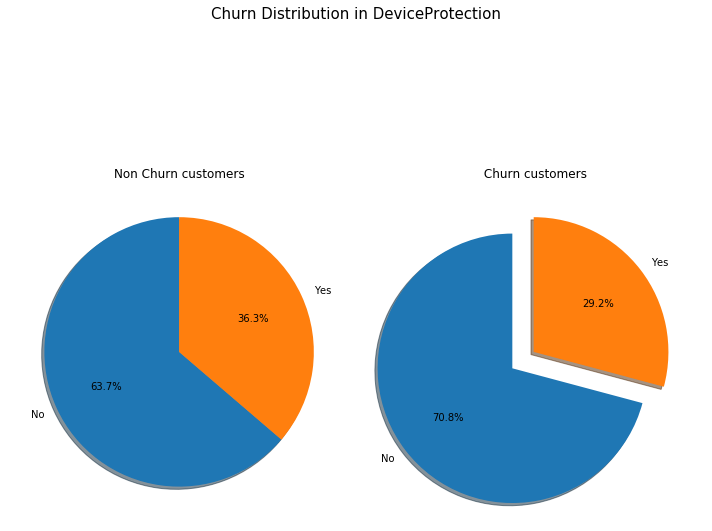

In [21]:
pie_cat(categorical_features[9])
#pie_cat(categorical_features[10])
#pie_cat(categorical_features[11])


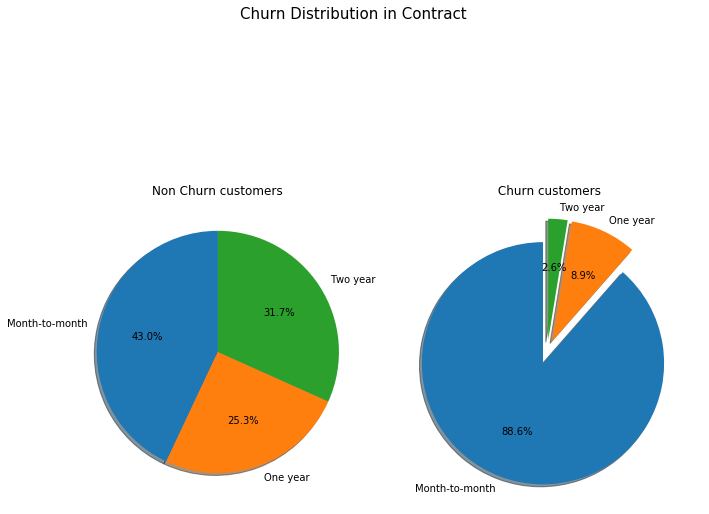

In [22]:
ex = (0.1,0.1,0.1)
#pie_cat(categorical_features[12])
pie_cat(categorical_features[13],ex)
#pie_cat(categorical_features[14])

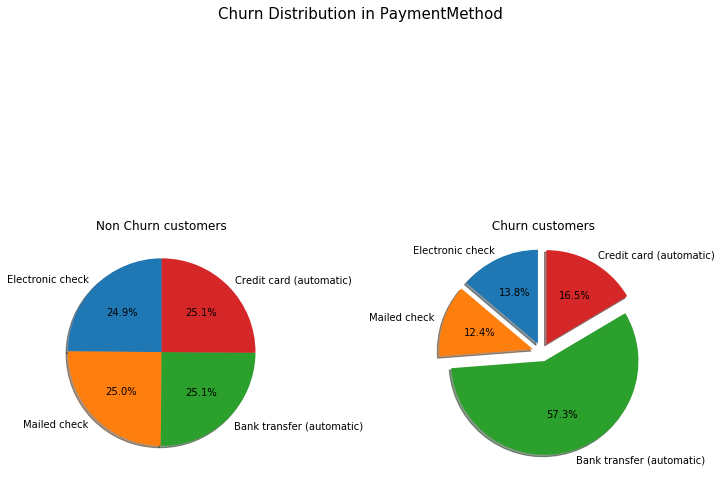

In [23]:
ex = (0.1,0.1,0.1,0.1)
pie_cat(categorical_features[15],ex)

In [24]:
raw_data_3 = raw_data_2.copy()
def tenure_lab(raw_data_3) :
    
    if raw_data_3["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (raw_data_3["tenure"] > 12) & (raw_data_3["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (raw_data_3["tenure"] > 24) & (raw_data_3["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (raw_data_3["tenure"] > 48) & (raw_data_3["tenure"] <= 60) :
        return "Tenure_48-60"
    elif raw_data_3["tenure"] > 60 :
        return "Tenure_gt_60"
    
raw_data_3['tenure'] = raw_data_2.apply(lambda raw_data_2:tenure_lab(raw_data_2),axis = 1)


In [25]:
def tenure_non_churn(cat_col):
    temp = raw_data_3.groupby(['Churn',cat_col])['Churn'].count()
    return temp[0]
def tenure_churn(cat_col):
    temp = raw_data_3.groupby(['Churn',cat_col])['Churn'].count()
    return temp[1]

def tenure_pie_cat(cat_col,explode=(0.1,0.1,0.1,0.1,0.1)):
    p2= tenure_non_churn(cat_col)
    p3 = tenure_churn(cat_col)
    fig1,(ax2,ax3) = plt.subplots(1,2,figsize=(10,10))

    labels = raw_data_3[cat_col].unique()
    ax3.pie(p3, autopct='%1.1f%%',
        shadow=True,explode=explode,labels=labels, startangle=90)
    ax2.pie(p2,  autopct='%1.1f%%',
        shadow=True,labels=labels,startangle=90)
    ax2.set_title('Non Churn customers')
    ax3.set_title(' Churn customers')
    plt.suptitle('Churn Distribution in '+ cat_col,fontsize='15')
    plt.tight_layout()
    plt.show()


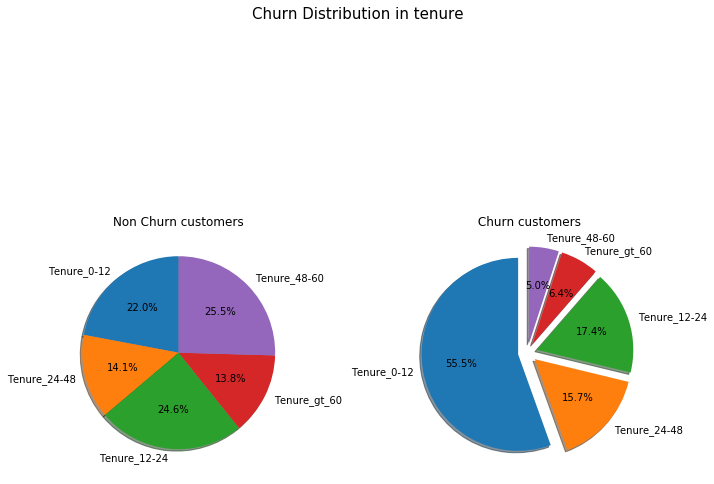

In [26]:
tenure_pie_cat('tenure')


# Customer Attrition According to Charges and tenure

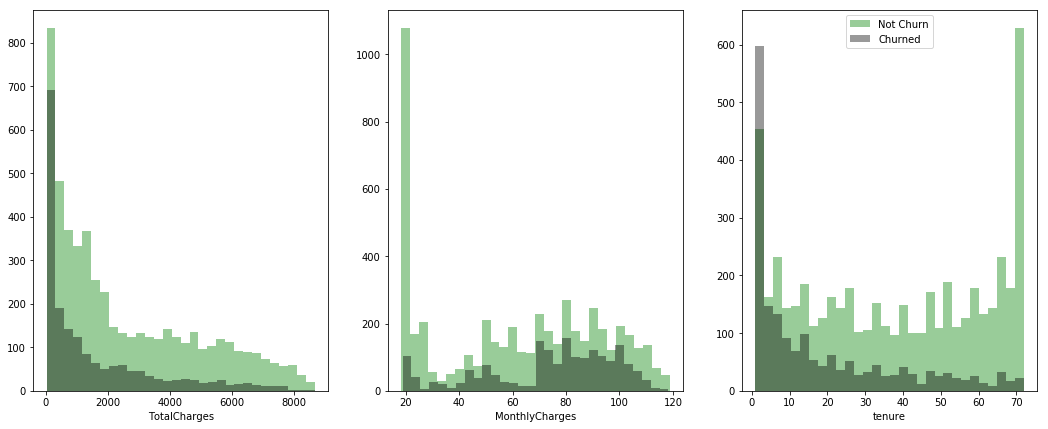

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,7))

sns.distplot(raw_data_2[raw_data_2.Churn==0]['TotalCharges']
             ,bins=30,kde=False,color='Green',ax=ax1,label=['Not Churn'])
sns.distplot(raw_data_2[raw_data_2.Churn==1]['TotalCharges']
             ,bins=30,kde=False,color='Black',ax=ax1,label=['Churned'])

sns.distplot(raw_data_2[raw_data_2.Churn==0]['MonthlyCharges']
             ,bins=30,kde=False,color='Green',ax=ax2,label=['Not Churn'])
sns.distplot(raw_data_2[raw_data_2.Churn==1]['MonthlyCharges']
             ,bins=30,kde=False,color='Black',ax=ax2,label=['Churned'])

sns.distplot(raw_data_2[raw_data_2.Churn==0]['tenure']
             ,bins=30,kde=False,color='Green',ax=ax3,label=['Not Churn'])
sns.distplot(raw_data_2[raw_data_2.Churn==1]['tenure']
             ,bins=30,kde=False,color='Black',ax=ax3,label=['Churned'])
plt.legend()

# Relation between Numerical Variables

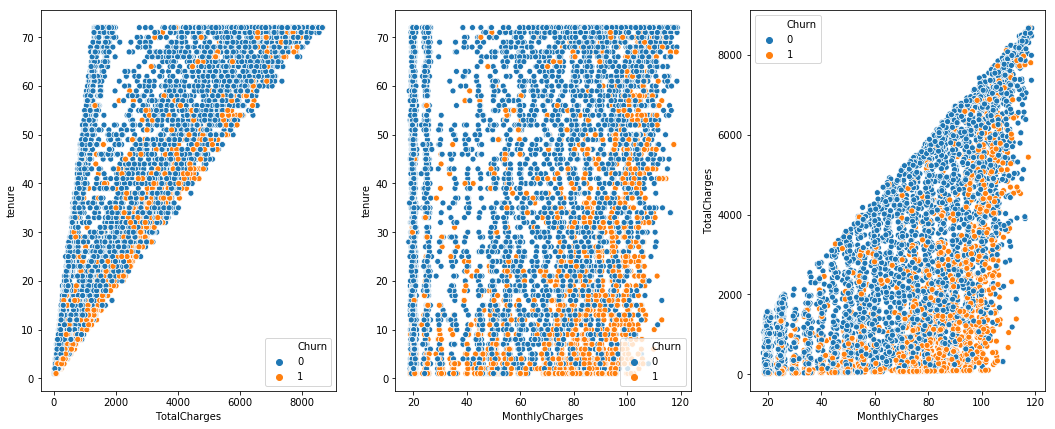

In [28]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,7))
sns.scatterplot(raw_data_2['TotalCharges'],
                raw_data_2['tenure'],color='Black',ax=ax1,hue=raw_data_2['Churn'])
sns.scatterplot(raw_data_2['MonthlyCharges'],
                raw_data_2['tenure'],color='Black',ax=ax2,hue=raw_data_2['Churn'])
sns.scatterplot(raw_data_2['MonthlyCharges'],
                raw_data_2['TotalCharges'],color='Black',ax=ax3,hue=raw_data_2['Churn'])

In [29]:
#fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,7))
#sns.scatterplot(raw_data_2[raw_data_2.Churn==1]['TotalCharges'],
#                raw_data_2[raw_data_2.Churn==1]['tenure'],color='Black',ax=ax1)
#sns.scatterplot(raw_data_2[raw_data_2.Churn==1]['MonthlyCharges'],
#                raw_data_2[raw_data_2.Churn==1]['tenure'],color='Black',ax=ax2)
#sns.scatterplot(raw_data_2[raw_data_2.Churn==1]['MonthlyCharges'],
#                raw_data_2[raw_data_2.Churn==1]['TotalCharges'],color='Black',ax=ax3)

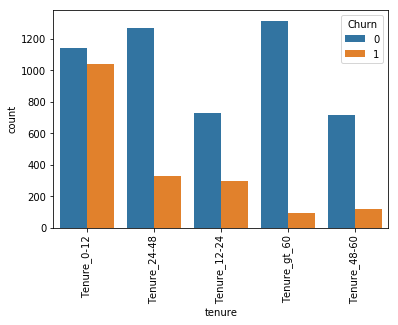

In [30]:
plt.figsize=(200,10)
plt.xticks(rotation=90)
sns.countplot(raw_data_3['tenure'],hue=raw_data_3['Churn'])
plt.show()


In [31]:
#sns.scatterplot(raw_data_3[raw_data_3.Churn==1]['MonthlyCharges'],
 #               raw_data_3[raw_data_3.Churn==1]['TotalCharges'],color='Black',hue=raw_data_3['tenure'])

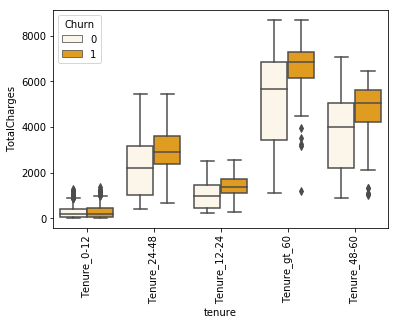

In [32]:
plt.xticks(rotation=90)
sns.boxplot( raw_data_3['tenure'],raw_data_3['TotalCharges'],color='Orange',hue=raw_data_3['Churn'])

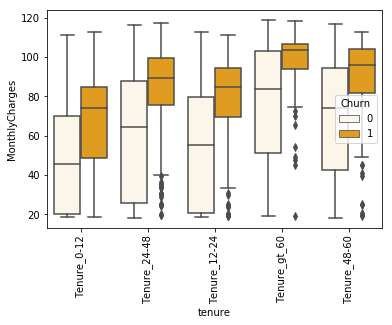

In [33]:
plt.xticks(rotation=90)
sns.boxplot( raw_data_3['tenure'],raw_data_3['MonthlyCharges'],color='Orange',hue=raw_data_3['Churn'])

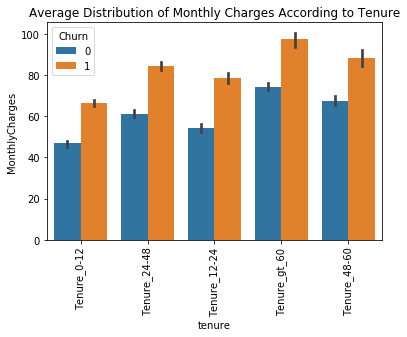

In [34]:
plt.xticks(rotation=90)
sns.barplot(raw_data_3['tenure'],
            raw_data_3['MonthlyCharges'],hue=raw_data_3['Churn'],
            estimator=np.mean).set_title('Average Distribution of Monthly Charges According to Tenure')
plt.show()

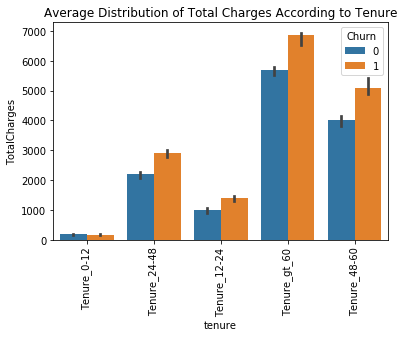

In [35]:
plt.xticks(rotation=90)
sns.barplot(raw_data_3['tenure']
            ,raw_data_3['TotalCharges'],hue=raw_data_3['Churn'],
            estimator=np.median).set_title('Average Distribution of Total Charges According to Tenure')
plt.show()

In [36]:
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization



trace1 = go.Scatter3d(x = raw_data_2[raw_data_2.Churn==1]["MonthlyCharges"],
                      y = raw_data_2[raw_data_2.Churn==1]["TotalCharges"],
                      z = raw_data_2[raw_data_2.Churn==1]["tenure"],
                      mode = "markers",
                      name = "Churn customers",
                      
                      marker = dict(size = 1,color = "red")
                     )


layout = go.Layout(dict(title = "Monthly charges,total charges & tenure in customer attrition",
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = "monthly charges(x)",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = "total charges(y)",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = "tenure(z)",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )
                                    ),
                        height = 700,
                       )
                  )
                  

data = trace1
fig  = go.Figure(data = data,layout = layout)
py.iplot(fig)

# Data Pre-processing

In [37]:
#Creating Checkpoint
raw_data_4 = raw_data_2.copy()

###Creating Categories for Tenure, code is courtesy of Pavan Raj


In [38]:
input = raw_data_4.drop('Churn',axis=1)
target = raw_data_4['Churn']
input = pd.get_dummies(input,drop_first=True)

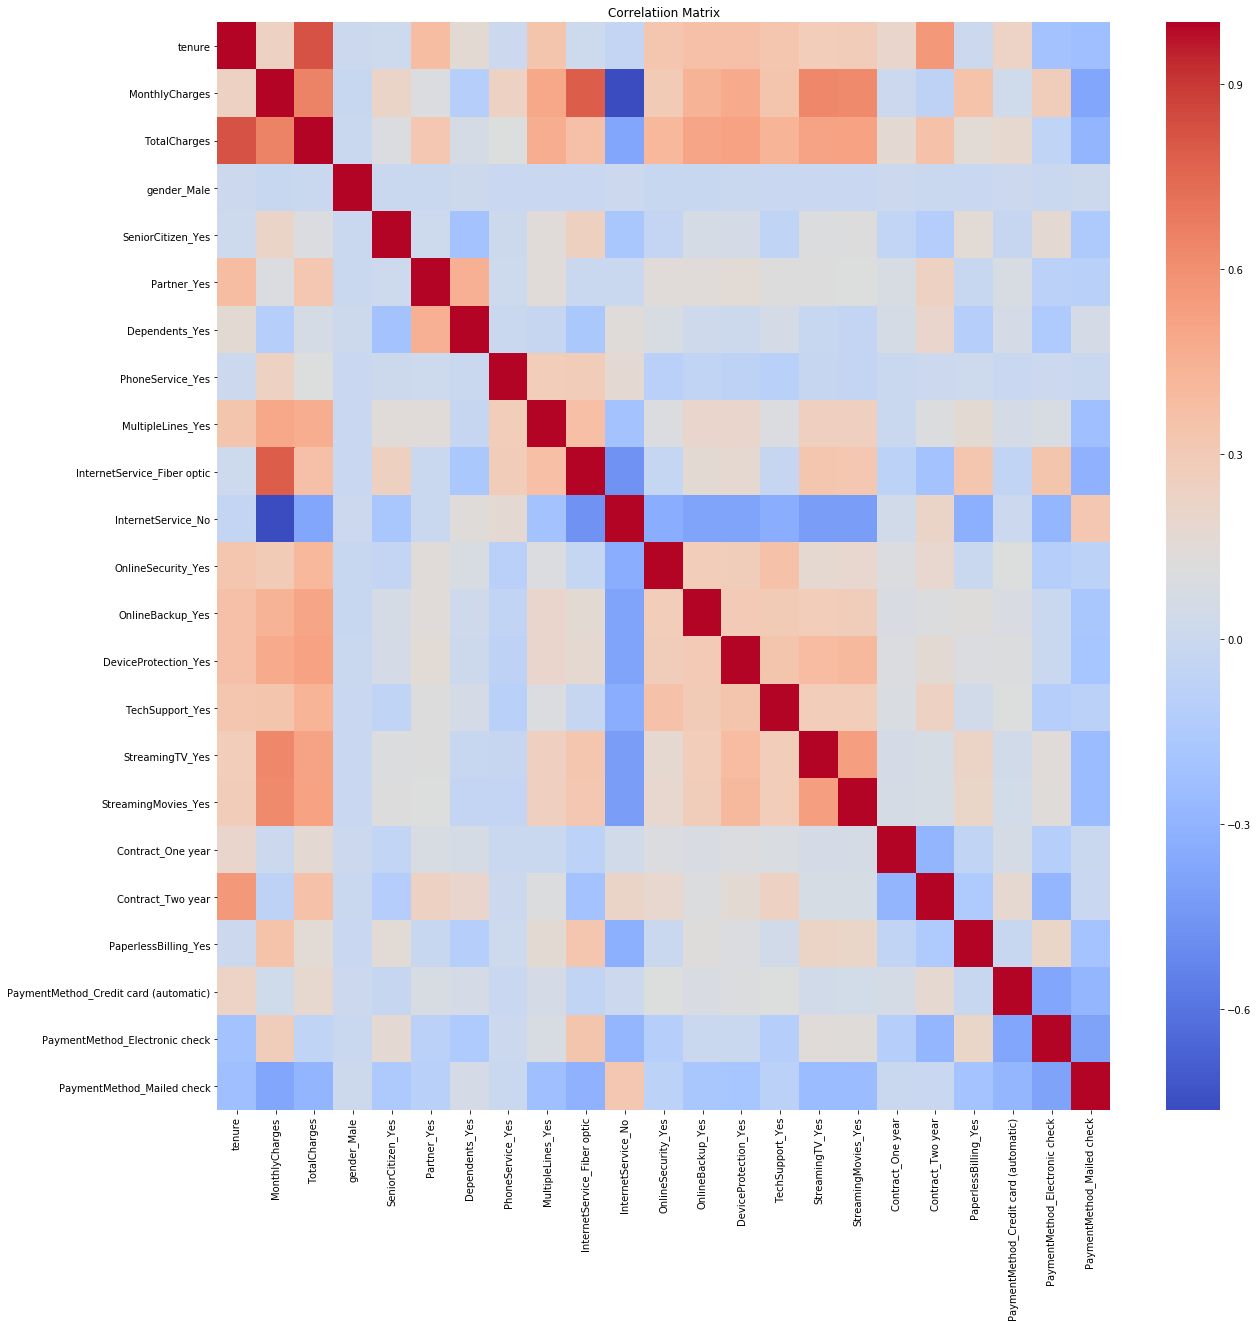

In [39]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(input.corr(),cmap='coolwarm').set_title('Correlatiion Matrix')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
num_cols=['MonthlyCharges','TotalCharges','tenure']
std = StandardScaler()
scaled = std.fit_transform(input[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
input_2 = input.drop('MonthlyCharges',axis =1)
input_2 = input_2.drop('TotalCharges',axis =1)
input_2 = input_2.drop('tenure',axis =1)
scaled_input = pd.merge(scaled, input_2, left_index=True, right_index=True)


In [41]:
scaled_input.head()

,MonthlyCharges,TotalCharges,tenure,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.161694,-0.994194,-1.280248,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.260878,-0.173740,0.064303,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,-0.363923,-0.959649,-1.239504,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,-0.747850,-0.195248,0.512486,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,0.196178,-0.940457,-1.239504,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


Building a Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

In [43]:
score, pvalue = chi2(input,target)

In [44]:
#pvalue.round(3)

In [45]:
#reg_summary['P Values'] = pvalue.round(3)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(scaled_input,target,test_size = .25 ,random_state = 111)
x_train.head()


,MonthlyCharges,TotalCharges,tenure,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1386,0.698109,0.069244,-0.139417,1,0,1,0,1,1,1,...,1,0,0,0,0,0,1,0,1,0
5086,0.832733,1.571223,1.327365,0,0,0,0,1,1,1,...,0,1,0,0,1,0,1,0,1,0
1584,0.005046,-0.789571,-1.035784,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
771,0.801154,-0.806998,-1.117272,0,0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
5674,-0.466969,-0.119959,0.268022,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,1,0



 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1268
           1       0.68      0.53      0.60       490

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758

Test Accuracy   Score :  0.7997724687144482
Train Accuracy   Score :  0.8090633295411452
Area under curve :  0.7184510397218824 



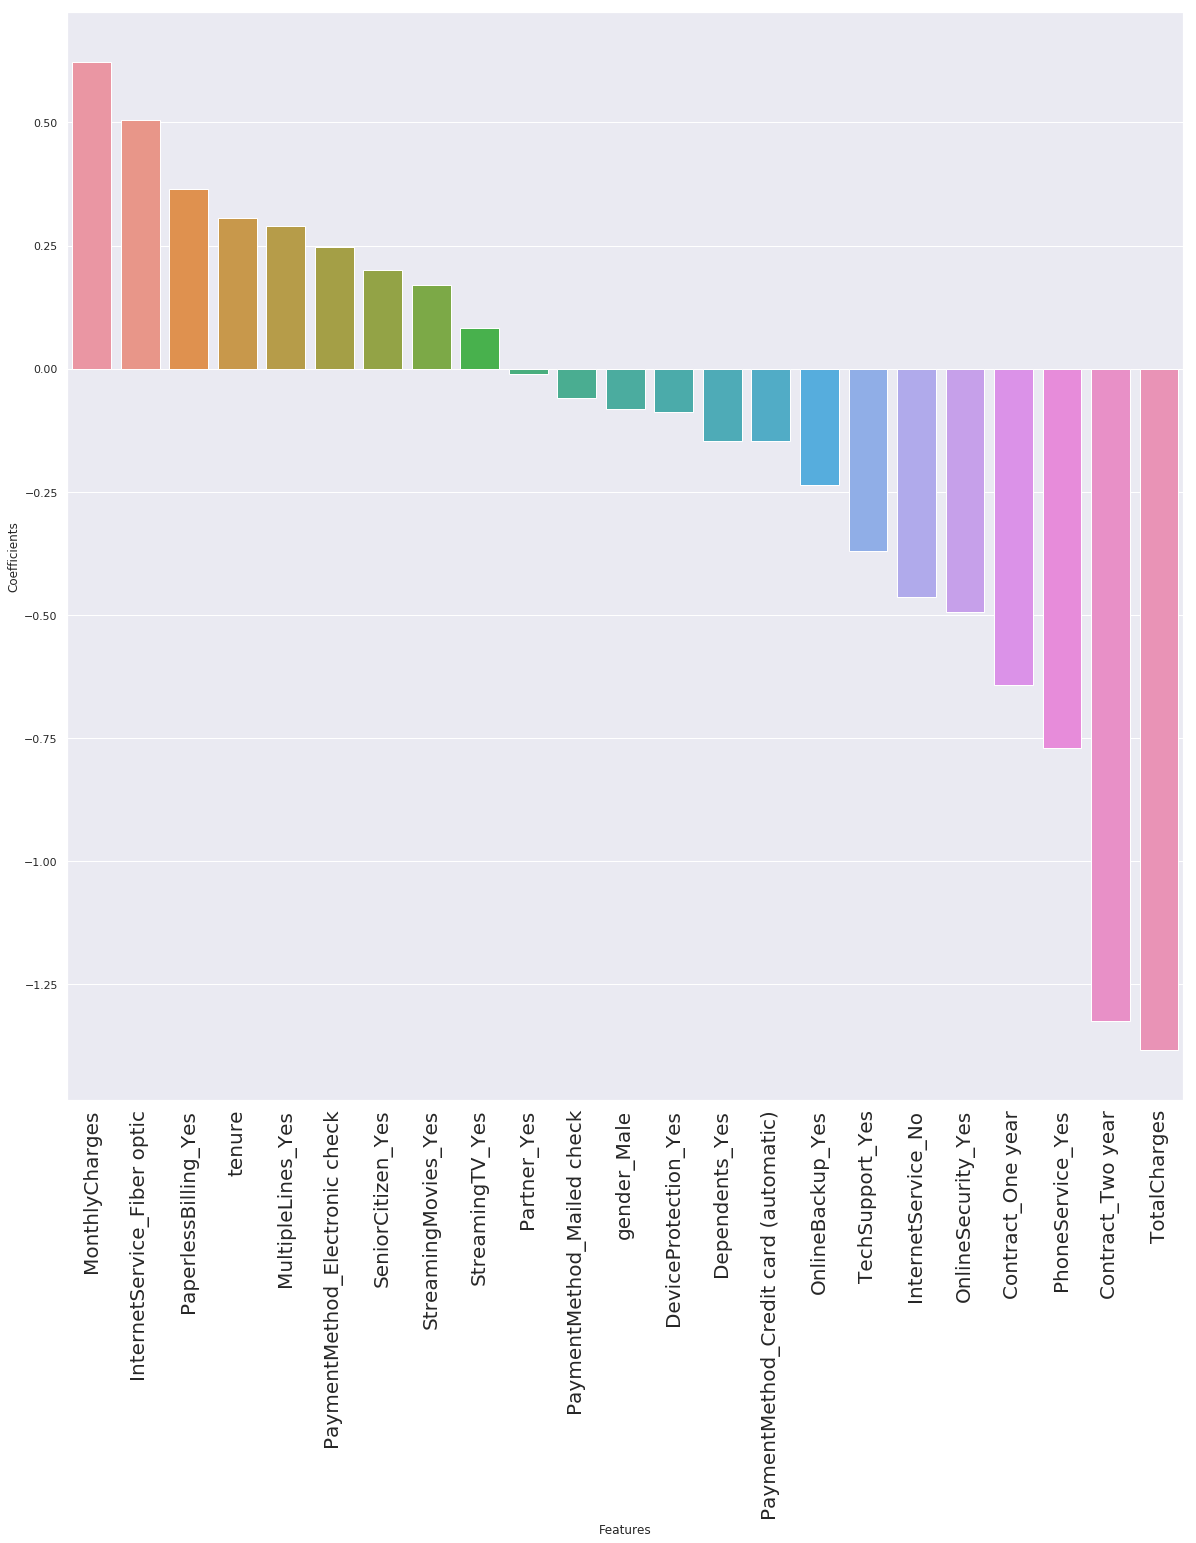

In [47]:
#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
sns.set()

logit  = LogisticRegression(class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit.fit(x_train,y_train)
predictions = logit.predict(x_test)
probabilities = logit.predict_proba(x_test)
predictions_train = logit.predict(x_train)

reg_summary = pd.DataFrame(data = input.columns.values, columns=['Features'])
reg_summary['Coefficients'] = logit.coef_.ravel()

reg_summary_2=reg_summary.sort_values(by = "Coefficients",ascending = False)
log_test = accuracy_score(y_test,predictions)
log_train = accuracy_score(y_train,predictions_train)
print ("\n Classification report : \n",classification_report(y_test,predictions))

print ("Test Accuracy   Score : ",accuracy_score(y_test,predictions))
print ("Train Accuracy   Score : ",accuracy_score(y_train,predictions_train))

conf_matrix = confusion_matrix(y_test,predictions)
model_roc_auc = roc_auc_score(y_test,predictions)

print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
fig,ax1=plt.subplots(1,figsize=(20,20))
sns.set(font_scale=1.4)
sns.barplot(reg_summary_2['Features'],reg_summary_2['Coefficients'],ax=ax1,orient='v')
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()


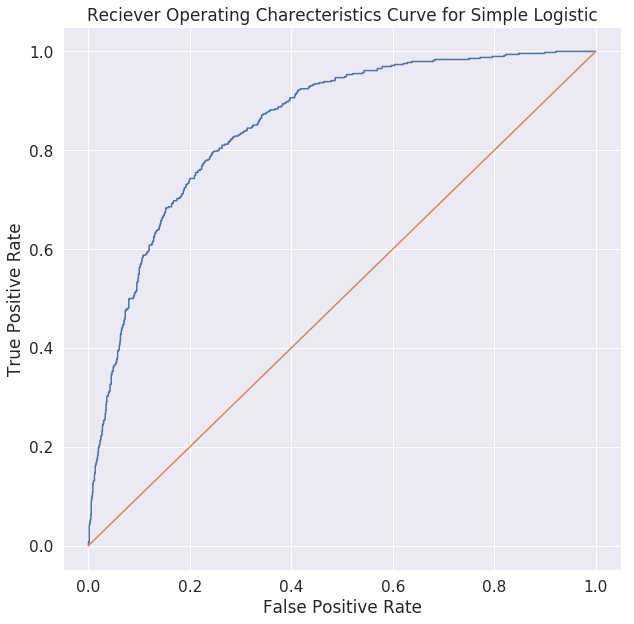

In [48]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1])
ax.set_title('Reciever Operating Charecteristics Curve for Simple Logistic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

# Recursive Feature Logistic Regression

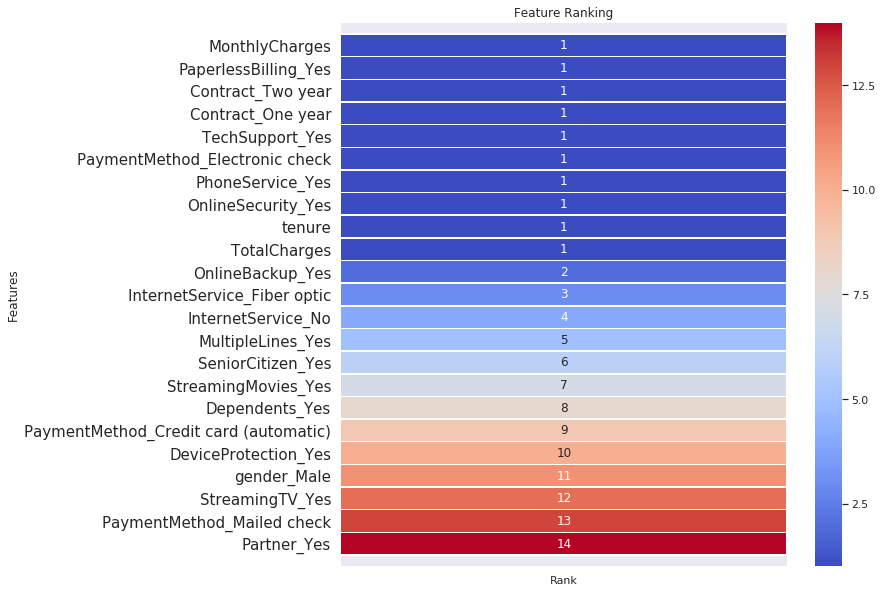

In [49]:

sns.set()
from sklearn.feature_selection import RFE

logit_rfe = LogisticRegression(solver='liblinear')

rfe = RFE(logit_rfe,10)
rfe = rfe.fit(x_train,y_train)

data = pd.DataFrame(data = x_train.columns.values, columns=['Features'])
data['Support']=rfe.support_
data['Rank']=rfe.ranking_

cols = data[data.Support==True]['Features'].values
data

data_2 = data.drop('Support',axis=1)
fig,ax = plt.subplots(figsize=(10,10))
data_2= data_2.set_index('Features').sort_values(by = "Rank",ascending = True)
sns.heatmap(data_2,cmap='coolwarm',annot=True,fmt='g',linewidths=.5,ax=ax).set_title('Feature Ranking')
b,t = plt.ylim()
b +=0.5
t -=0.5
plt.ylim(b,t)
plt.yticks(fontsize=15)
plt.show()



 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1268
           1       0.69      0.54      0.60       490

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.74      1758
weighted avg       0.79      0.80      0.80      1758

Test Accuracy   Score :  0.8037542662116041
Train Accuracy   Score :  0.7995828593098218
Area under curve :  0.7224634648812206 



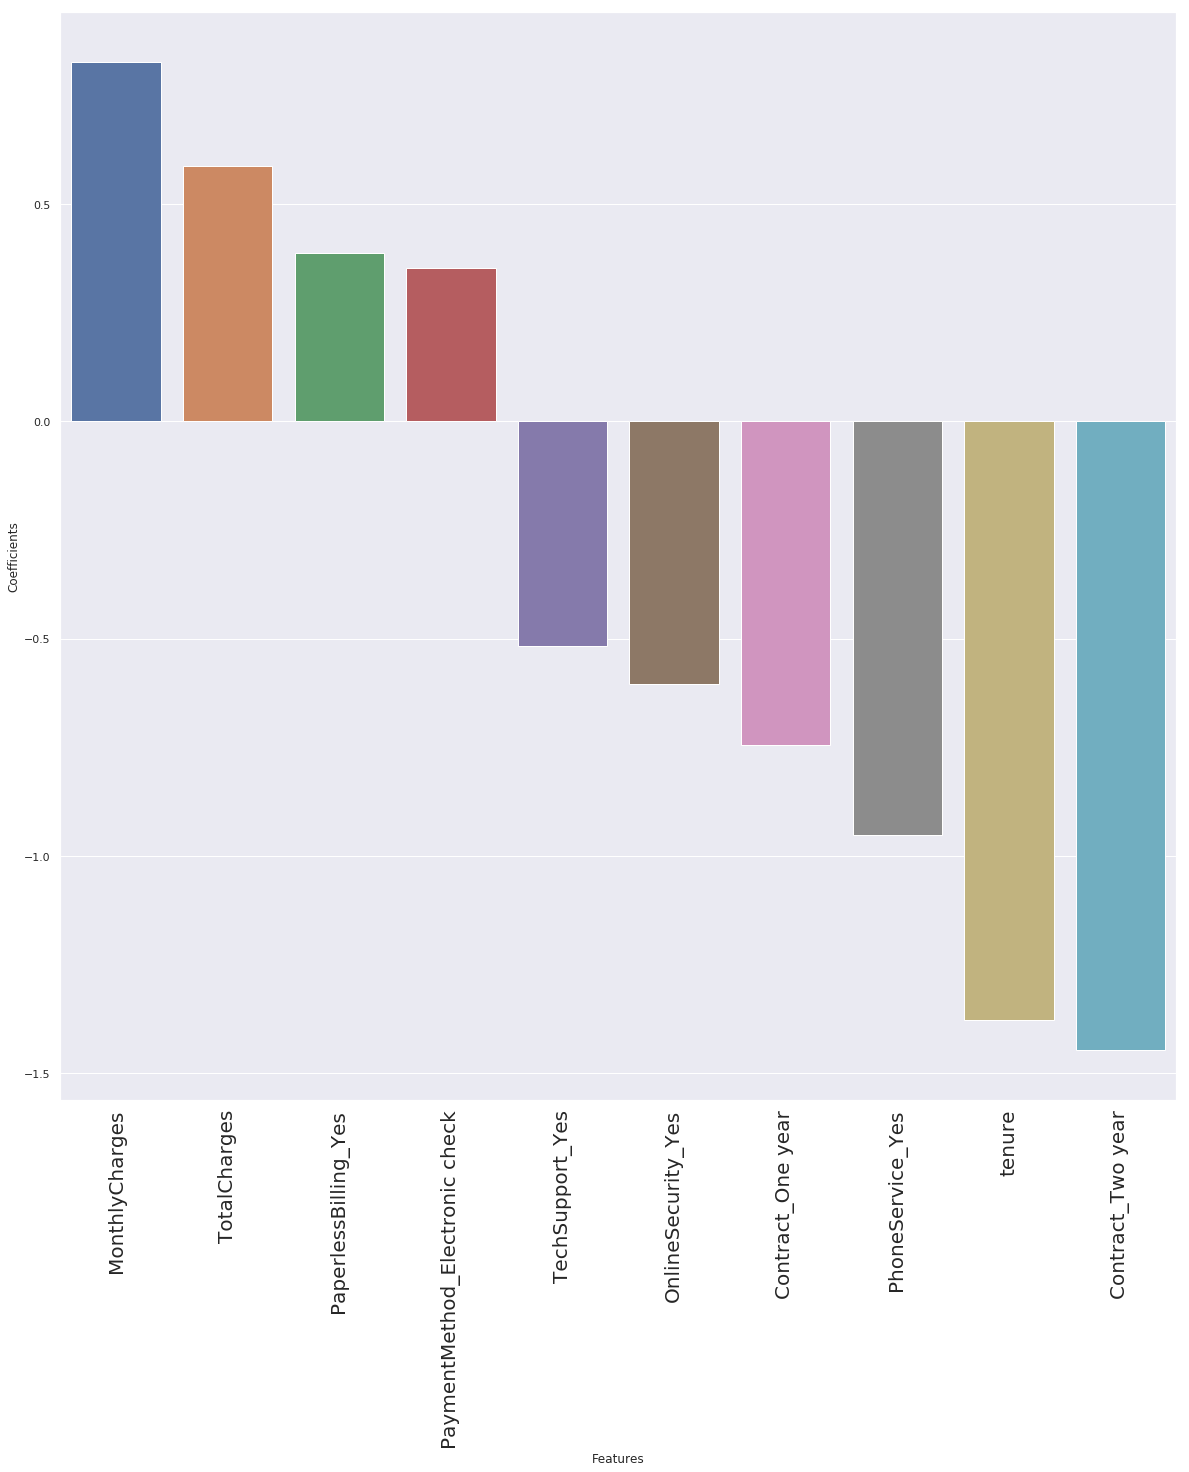

In [50]:

logit  = LogisticRegression(class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit.fit(x_train[cols],y_train)
predictions = logit.predict(x_test[cols])
probabilities = logit.predict_proba(x_test[cols])
predictions_train = logit.predict(x_train[cols])
reg_summary_3 = pd.DataFrame(data = x_train[cols].columns.values, columns=['Features'])
reg_summary_3['Coefficients'] = logit.coef_.ravel()
reg_summary_4=reg_summary_3.sort_values(by = "Coefficients",ascending = False)
log_rfe_test= accuracy_score(y_test,predictions)
log_rfe_train=accuracy_score(y_train,predictions_train)
print ("\n Classification report : \n",classification_report(y_test,predictions))

print ("Test Accuracy   Score : ",accuracy_score(y_test,predictions))
print ("Train Accuracy   Score : ",accuracy_score(y_train,predictions_train))

conf_matrix_2 = confusion_matrix(y_test,predictions)
model_roc_auc_2 = roc_auc_score(y_test,predictions)
print ("Area under curve : ",model_roc_auc_2,"\n")

fpr_1,tpr_1,thresholds = roc_curve(y_test,probabilities[:,1])

fig,ax1=plt.subplots(1,figsize=(20,20))
sns.set(font_scale=1.4)
sns.barplot(reg_summary_4['Features'],reg_summary_4['Coefficients'],ax=ax1,orient='v')
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()



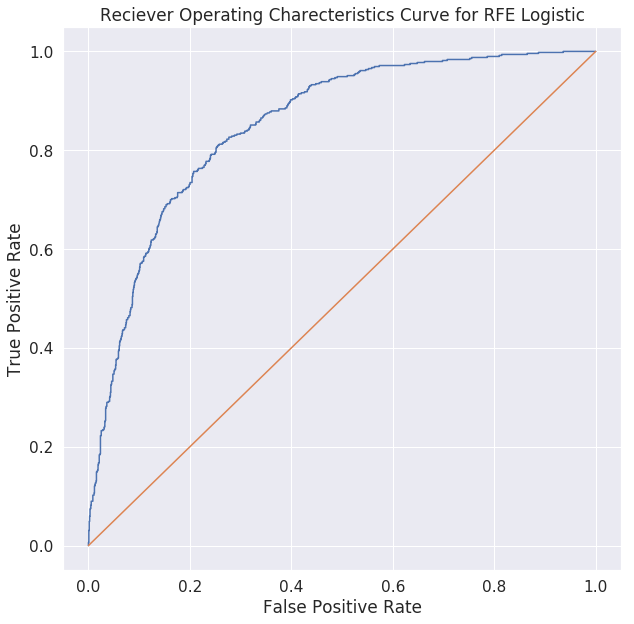

In [51]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(fpr_1,tpr_1)
ax.plot([0,1],[0,1])
ax.set_title('Reciever Operating Charecteristics Curve for RFE Logistic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

# Comparision Between Simple Logistic and RFE Logsitic

In [52]:


df = pd.DataFrame(data = ['True Positive:','True Negative','False Negative:','False Positive:','AUC Score:','Train Accuracy','Test Accurcacy','Train Samples','Test Samples'], columns=['Features'])
df['Simple Log'] = conf_matrix[1][1],conf_matrix[0][0],conf_matrix[1][0],conf_matrix[0][1],model_roc_auc*100,log_train*100,log_test*100,5274,1758


df['RFE Log'] = conf_matrix_2[1][1],conf_matrix_2[0][0],conf_matrix_2[1][0], conf_matrix_2[0][1],model_roc_auc_2*100,log_rfe_train*100,log_rfe_test*100,5274,1758
print(df)

          Features   Simple Log      RFE Log
0   True Positive:   262.000000   264.000000
1    True Negative  1144.000000  1149.000000
2  False Negative:   228.000000   226.000000
3  False Positive:   124.000000   119.000000
4       AUC Score:    71.845104    72.246346
5   Train Accuracy    80.906333    79.958286
6   Test Accurcacy    79.977247    80.375427
7    Train Samples  5274.000000  5274.000000
8     Test Samples  1758.000000  1758.000000


In [53]:
df =df.set_index('Features')


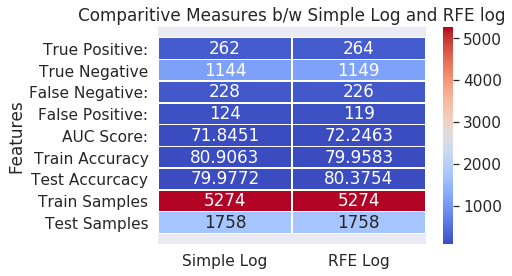

In [54]:

sns.heatmap(df,cmap='coolwarm',annot=True,fmt='g',linewidths=.5).set_title('Comparitive Measures b/w Simple Log and RFE log')
b,t = plt.ylim()
b +=0.5
t -=0.5
plt.ylim(b,t)
plt.show()